**IMPORT LIBRARY**

In [23]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DECISION TREE KLASIFIKASI DATASET PADA COUNTER STRIKE 2**

In [24]:
dataset = pd.read_csv('dataset/K03_counter_strike_2.csv', delimiter=',')
dataset


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


**MELIHAT INFO DATASET**

In [25]:
#MELIHAT INFO DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time_left     2000 non-null   float64
 1   ct_score      2000 non-null   float64
 2   t_score       2000 non-null   float64
 3   map           2000 non-null   object 
 4   bomb_planted  2000 non-null   bool   
 5   ct_health     2000 non-null   float64
 6   t_health      2000 non-null   float64
 7   ct_armor      2000 non-null   float64
 8   t_armor       2000 non-null   float64
 9   ct_money      2000 non-null   float64
 10  t_money       2000 non-null   float64
 11  ct_helmets    2000 non-null   float64
 12  t_helmets     2000 non-null   float64
 13  round_winner  2000 non-null   object 
dtypes: bool(1), float64(11), object(2)
memory usage: 205.2+ KB


**MELIHAT RINGKASAN STATISTIK DATASET**

In [26]:
#MELIHAT RINGKASAN STATISTIK DATASET
dataset.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,95.630205,6.840000,6.28850,406.170500,402.987500,306.749000,309.54450,7867.350000,12377.600000,1.821500,3.009500
std,53.734491,4.233599,4.19059,137.616258,137.699186,172.857221,168.68957,9017.491838,12209.581798,1.774884,1.960952
min,0.050000,0.000000,0.00000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.00000,315.750000,328.750000,188.000000,190.00000,1200.000000,1700.000000,0.000000,1.000000
50%,94.910000,7.000000,6.00000,500.000000,500.000000,300.000000,362.00000,4000.000000,9075.000000,1.000000,4.000000
75%,156.425000,10.000000,10.00000,500.000000,500.000000,488.000000,467.00000,11762.500000,19250.000000,3.000000,5.000000
max,175.000000,15.000000,15.00000,500.000000,500.000000,500.000000,500.00000,58050.000000,67700.000000,5.000000,5.000000


**CEK DATA KOSONG**

In [27]:
#CEK DATA KOSONG
dataset.isna().sum()

,0
time_left,0
ct_score,0
t_score,0
map,0
bomb_planted,0
ct_health,0
t_health,0
ct_armor,0
t_armor,0
ct_money,0


**`DECISION TREE CLASSIFER`**

**MEMBAGI DATA MENJADI ATRIBUT DAN TARGET**

In [28]:
print(dataset.columns)

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'round_winner'],
      dtype='object')


In [29]:
# Membagi data menjadi atribut (X) dan target (y)
X = dataset.drop(['round_winner'], axis=1)
y = dataset['round_winner']


In [30]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
le_map = LabelEncoder()
le_round_winner = LabelEncoder()

# Mengubah kolom 'map' dan 'round_winner' menjadi numerik
X['map'] = le_map.fit_transform(X['map'])
y = le_round_winner.fit_transform(y)


**MEMBAGI DATASET MENJADI DATA LATI DAN ATA UJI**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**MEMBUAT MODEL**

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**VISUALISASI MODEL DECISION TREE**

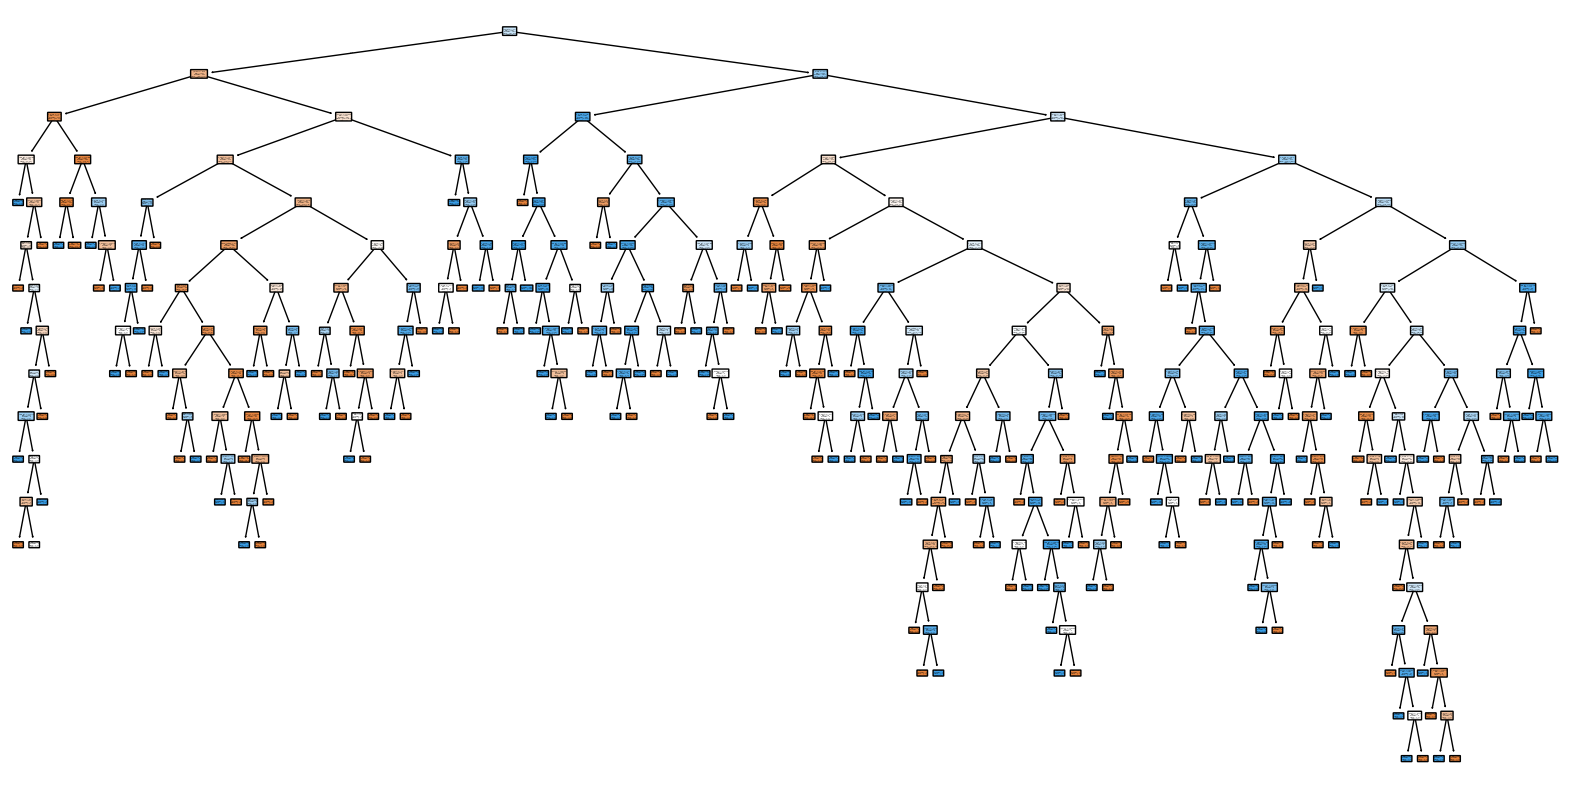

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot tree dengan visualisasi
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=le_round_winner.classes_, filled=True, rounded=True)
plt.show()


**EVALUASI MODEL**

In [40]:
#EVALUASI MODEL
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)


0.835

**CETAK CLASSIFICATION REPORT**

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       237
           1       0.87      0.85      0.86       363

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.84      0.83      0.84       600



In [42]:
print(X_test[:5])
print(y_test[:5])
print(y_pred[:5])

      time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
1860     114.97      14.0     14.0    2         False      500.0     500.0   
353      109.95       2.0      8.0    0         False      500.0     500.0   
1333     174.93      11.0     15.0    3         False      500.0     500.0   
905      175.00       7.0      8.0    3         False      500.0     500.0   
1289     114.94      10.0     10.0    3         False      500.0     500.0   

      ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  
1860     500.0    472.0    1050.0  30750.0         2.0        5.0  
353      200.0    500.0   13700.0   8200.0         1.0        5.0  
1333       0.0      0.0   19650.0  30500.0         0.0        0.0  
905      200.0    300.0    2100.0   1200.0         0.0        0.0  
1289     500.0    455.0    2250.0  23200.0         0.0        5.0  
[1 1 1 1 1]
[1 1 0 0 1]


**MENGUJI DENGAN DATA BARU**

In [36]:
# Contoh data uji baru
new_data = pd.DataFrame({
    'time_left': [120.0],
    'ct_score': [10],
    't_score': [12],
    'map': [2],  # Pastikan nilai ini sesuai dengan hasil LabelEncoder untuk 'map'
    'bomb_planted': [True],
    'ct_health': [400.0],
    't_health': [450.0],
    'ct_armor': [300.0],
    't_armor': [250.0],
    'ct_money': [5000.0],
    't_money': [8000.0],
    'ct_helmets': [3],
    't_helmets': [2]
})

# Prediksi hasil menggunakan model yang sudah dilatih
prediction = model.predict(new_data)

# Konversi hasil prediksi kembali ke label aslinya
predicted_label = le_round_winner.inverse_transform(prediction)

print("Prediksi hasil round winner:", predicted_label[0])


Prediksi hasil round winner: CT


**DECISION TREE REGRESI PADA DATASET CORRUPTION **

In [38]:
dataset = pd.read_csv('dataset/R04_corruptions.csv', delimiter=',')
dataset


,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60
5,2.4,75
6,3.9,55
7,2.7,70
8,3.8,57
9,2.9,71


In [50]:
X = df[['Corruption Perception (X)']]
y = df['Government Transparency (Y)']

**INFO DATASET**

In [39]:
#MELIHAT INFO DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Corruption Perception (X)    55 non-null     float64
 1   Government Transparency (Y)  55 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


**MELIHAT RINGKASAN STATISTIK DATASET**

In [40]:
#MELIHAT RINGKASAN STATISTIK DATASET
dataset.describe()

,Corruption Perception (X),Government Transparency (Y)
count,55.000000,55.000000
mean,3.307273,64.145455
std,0.784539,9.314302
min,2.000000,50.000000
25%,2.650000,56.000000
50%,3.300000,63.000000
75%,4.000000,71.500000
max,4.500000,82.000000


**CETAK DATA KOSONG**

In [41]:
#CEK DATA KOSONG
dataset.isna().sum()

,0
Corruption Perception (X),0
Government Transparency (Y),0


**Bagi data menjadi set pelatihan dan pengujian**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Inisialisasi dan latih model Decision Tree Regressor**

In [52]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**Prediksi pada data uji**

In [53]:
y_pred = model.predict(X_test)

Evaluasi Model

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 11.136363636363637
R^2 Score: 0.8857857263943041


**Prediksi pada Inputan Baru**

In [56]:
new_data = [[3.5]]
prediction = model.predict(new_data)
print("Prediksi Government Transparency untuk Corruption Perception 3.5:", prediction[0])

Prediksi Government Transparency untuk Corruption Perception 3.5: 60.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Visualisasi Hasil regresi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


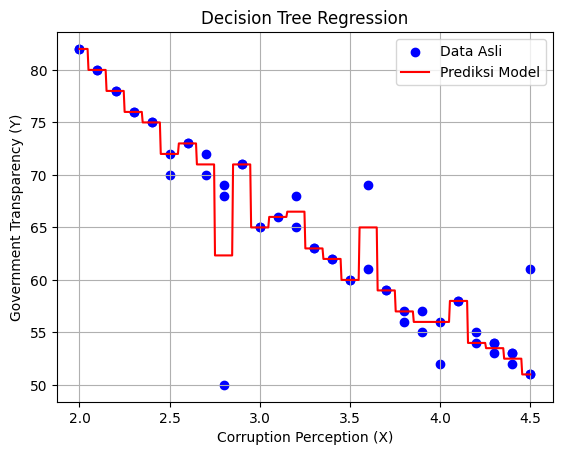

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Plot data asli
plt.scatter(X, y, color='blue', label='Data Asli')

# Buat prediksi pada rentang data untuk visualisasi
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_range_pred = model.predict(X_range)

# Plot prediksi model
plt.plot(X_range, y_range_pred, color='red', label='Prediksi Model')

# Label dan judul
plt.title('Decision Tree Regression')
plt.xlabel('Corruption Perception (X)')
plt.ylabel('Government Transparency (Y)')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()
